# IMPORTS

In [255]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch import nn, optim

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# DATASET CLASS

In [249]:
class Dataset(Dataset):
    
    def __init__(self, num_samples = 500, features = 1, noise = 20):
        self.x, self.y = make_regression(n_samples = num_samples, n_features = features, noise = noise)
        self.x = torch.from_numpy(self.x.astype(np.float32))
        self.y = torch.from_numpy(self.y.astype(np.float32))
        self.len = self.x.shape[0]

    def plot_dataset(self, name = 'Randomly generated dataset'):
        plt.figure(figsize = (10,5))
        plt.title(name)
        plt.scatter(self.x, self.y)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

    def minmax(self):
        return torch.min(self.x), torch.max(self.x)

# MODEL CLASS

In [250]:
class linear_regression(nn.Module):

    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

# OPT, LOSS

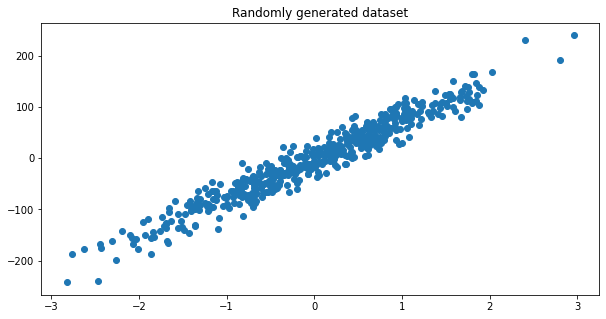

In [251]:
learning_rate = 0.0001
data = Dataset()
data.plot_dataset()
trainloader = DataLoader(dataset = data, batch_size = 1)

model = linear_regression(1,1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [252]:
def plot_data_with_line(epoch):

    data.plot_dataset(name = f'Epoch {epoch}')
    params = list(model.parameters())
    min_x, max_x = data.minmax() 
    x_range = np.arange(min_x, max_x, 0.1)
    y_range = (x_range * params[0][0].item()) + params[1][0].item()
    plt.plot(x_range, y_range, linewidth = 5, c='r')
    plt.show()

# TRAINING LOOP

In [253]:
def train_model(epochs):
    model.state_dict()['linear.weight'][0] = -15
    model.state_dict()['linear.bias'][0] = -10
    mean_loss_list = []
    for epoch in range(epochs + 1):
        loss_list = []

        for x,y in trainloader :
            
            pred = model.forward(x)
            loss = criterion(pred, y)
            loss_list.append(loss.item())
            
            optimizer.zero_grad() # Empties gradients from previous backward run
            loss.backward() # Backpropogates using differentiation to calculate gradients with respect to loss
            optimizer.step() # Updates parameters using SGD

        loss_list = np.array(loss_list)
        avg = np.mean(loss_list)
        if epoch % (epochs/10) == 0 : 
            plot_data_with_line(epoch)
            print('Average loss for epoch : ', avg)

        mean_loss_list.append(avg)
        
    plt.figure(figsize = (10,5))
    plt.title('Loss')
    plt.plot(mean_loss_list)

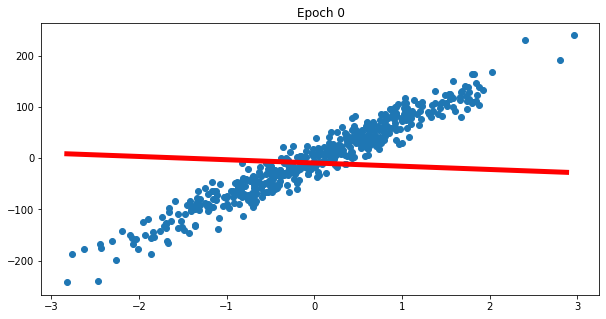

Average loss for epoch :  7894.9329989265725


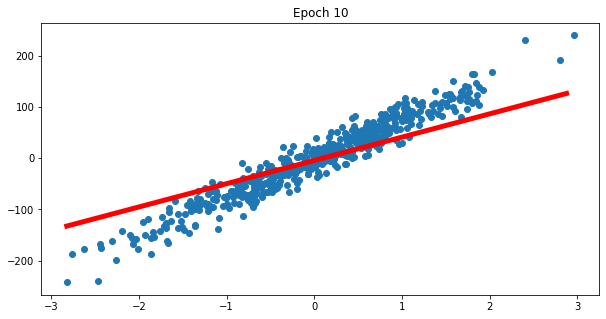

Average loss for epoch :  1387.4737536746318


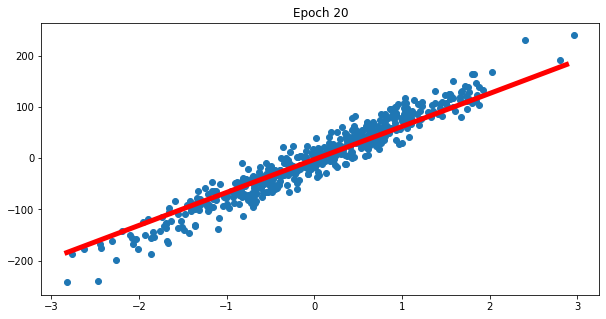

Average loss for epoch :  514.5285996029088


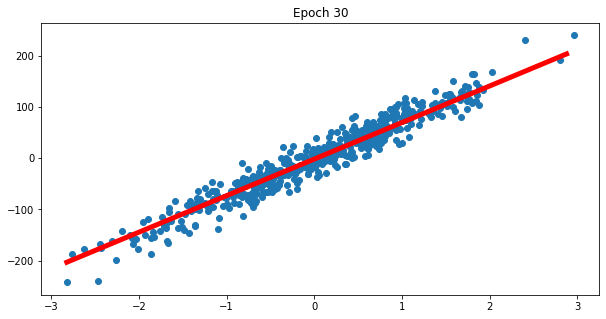

Average loss for epoch :  397.6040728872367


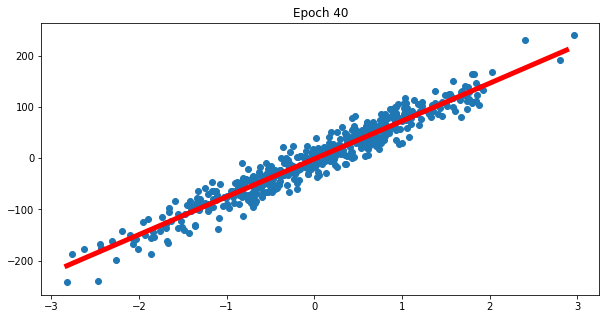

Average loss for epoch :  382.0111339955048


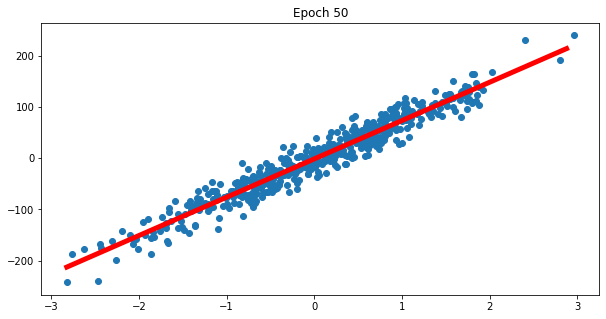

Average loss for epoch :  379.95653428985366


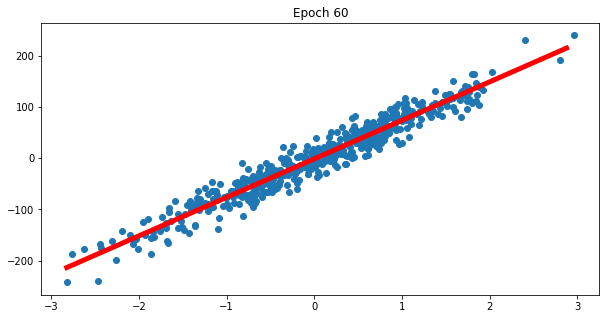

Average loss for epoch :  379.69478436330286


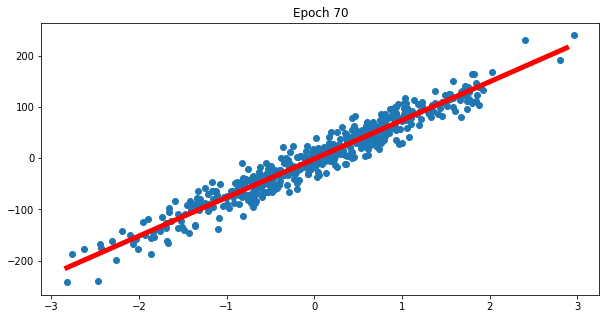

Average loss for epoch :  379.66485270768266


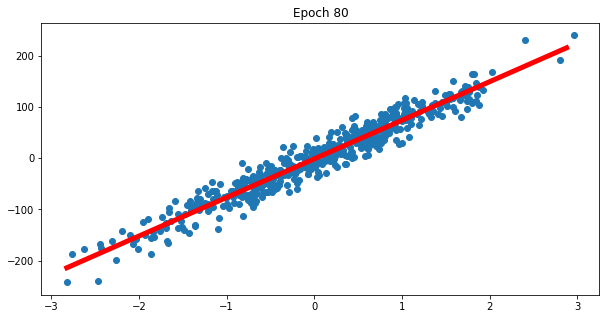

Average loss for epoch :  379.6628472600051


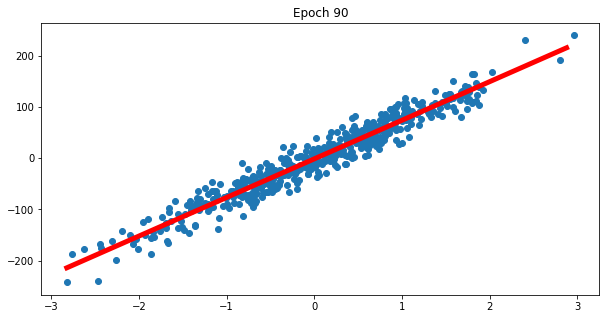

Average loss for epoch :  379.6631911392119


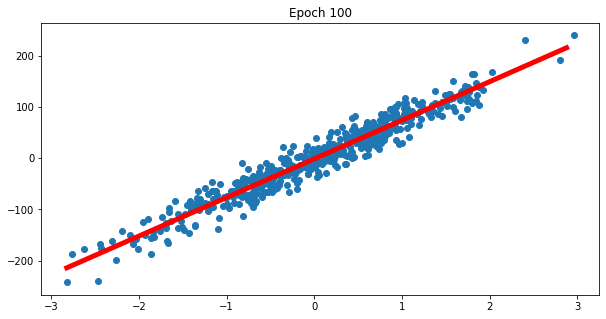

Average loss for epoch :  379.66356975415175


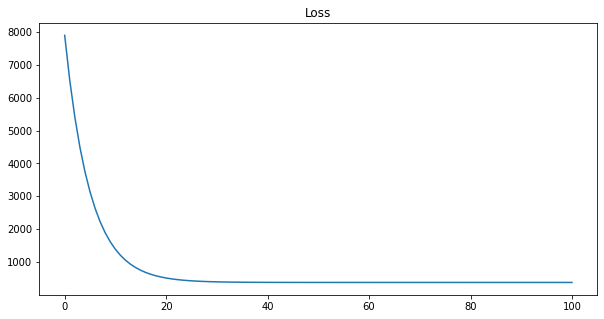

In [254]:
train_model(100)